In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
# 载入数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
# 定义模型
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(),
                    nn.Linear(256, 10))

# 初始化
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [4]:
# 损失函数
loss = nn.CrossEntropyLoss(reduction='none')

# 优化算法
lr = 0.1
trainer = torch.optim.SGD(net.parameters(), lr = lr)

In [5]:
num_epochs = 10
# d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [6]:
# 计算准确率
def accuracy_score(data_iter):
    net.eval()
    ac_cnt, sum_cnt = 0, 0
    for X, y in data_iter:
        ac_cnt += (net(X).argmax(axis=1) == y).sum()
        sum_cnt += y.numel()
    return ac_cnt / sum_cnt

accuracy_score(train_iter)

tensor(0.0575)

In [7]:
# 模型训练
def model_train(num_epochs):
    for epoch in range(num_epochs):
        net.train()
        for X, y in train_iter:
            l = loss(net(X), y)
            trainer.zero_grad()
            l.mean().backward()
            trainer.step()
        ac = accuracy_score(train_iter)
        print(f'iter {epoch+1}, ac {ac:.3f}')

num_epochs = 10
model_train(num_epochs)

iter 1, ac 0.751
iter 2, ac 0.794
iter 3, ac 0.823
iter 4, ac 0.837
iter 5, ac 0.849
iter 6, ac 0.845
iter 7, ac 0.842
iter 8, ac 0.861
iter 9, ac 0.853
iter 10, ac 0.863


In [9]:
# 模型测试
ac_test = accuracy_score(test_iter)
print(f'test_accuracy: {ac_test:.3f}')

test_accuracy: 0.848


torch.Size([256])


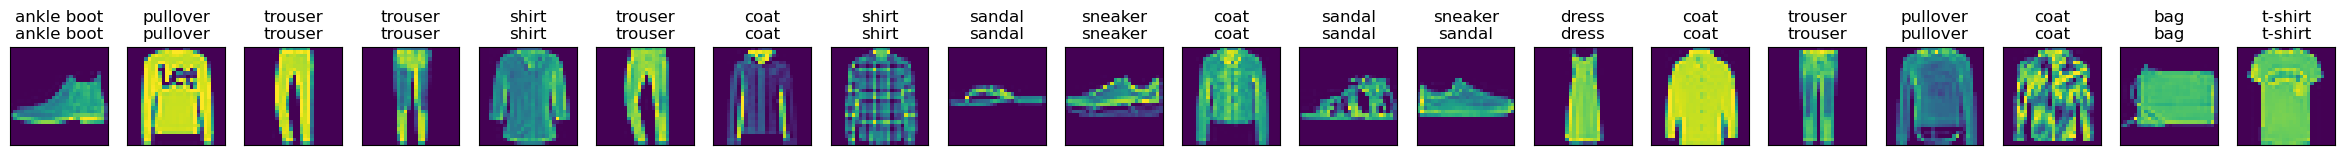

In [15]:
# 结果展示
def show_preds(net, test_iter, num_rows, num_cols):
    for X, y in test_iter:
        l = loss(net(X), y)
        print(l.shape)
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:num_rows*num_cols].reshape((num_rows*num_cols, 28, 28)), num_rows, num_cols, titles=titles[0:num_rows*num_cols])

show_preds(net, test_iter, 1, 20)